In [317]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
from sympy import oo, Symbol, integrate, stats
def convolve(f, g, t, lower_limit=-oo, upper_limit=oo):
    tau = Symbol('tconv', real=True)
    return integrate(f.subs(t, tau) * g.subs(t, t - tau), 
                     (tau, lower_limit, upper_limit))

In [318]:
A_f   = smp.Symbol('A_F', positive=True)
A_s   = smp.Symbol('A_S', positive=True)
tau_f = smp.Symbol('tau_F', positive=True)
tau_s = smp.Symbol('tau_S', positive=True)
t0    = smp.Symbol('t_0', positive=True)
t     = smp.Symbol('t', positive=True)
sig   = smp.Symbol('sigma', positive=True)


In [357]:
# lar = smp.Heaviside(t-t0)*(A_s*smp.exp(-(t-t0)/tau_s) + A_f*smp.exp(-(t-t0)/tau_f))
lar = smp.Heaviside(t-t0)*(A_s*smp.exp(-(t-t0)/tau_s))
gaus = smp.stats.Normal('t',0,sig)
gaus = stats.density(gaus)(t)
gaus


sqrt(2)*exp(-t**2/(2*sigma**2))/(2*sqrt(pi)*sigma)

0.7699945000196429

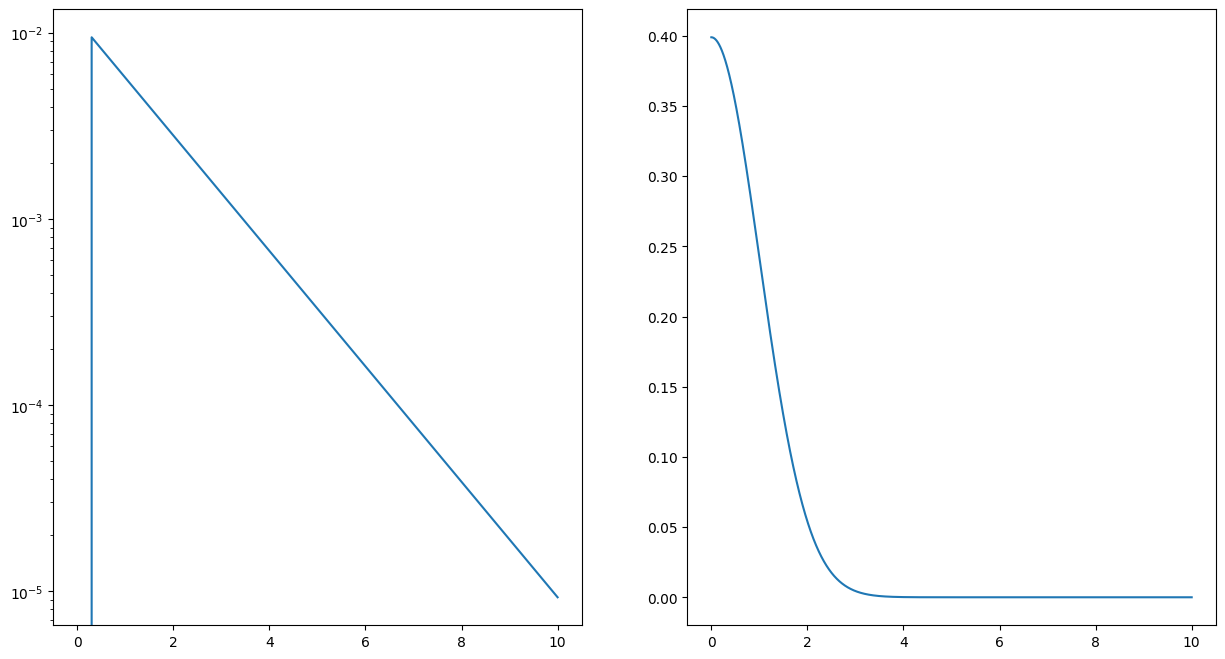

In [330]:
expr_lar = smp.lambdify([t, A_s, A_f, tau_s, tau_f, t0], lar)
t_num = np.linspace(0,10,25000)
fig, axes = plt.subplots(1,2, figsize=(15,8))
ax = axes[0]
acttaus = 1.4
acttauf = 0.004
actAs = 0.77*acttauf/(0.77*acttauf+0.23*acttaus)
actAf = 0.23*acttaus/(0.77*acttauf+0.23*acttaus)
ax.plot(t_num, expr_lar(t_num,actAs, actAf, acttaus, 0.004, 0.3))
ax.set_yscale("log")

ax =axes[1]
expr_gaus = smp.lambdify([t, sig], gaus)
ax.plot(t_num, expr_gaus(t_num,1))
expr_lar(0.30001,0.77, 0.23, 1.400, 0.004, 0.3)

In [345]:
fconv = convolve(lar,gaus,t,-oo,oo)


In [356]:
f = smp.simplify(fconv)
f = f.rewrite(smp.erfc)
f


A_S*exp((sigma**2/(2*tau_S) - t + t_0)/tau_S)*erfc(sqrt(2)*(sigma**2 - t*tau_S + t_0*tau_S)/(2*sigma*tau_S))/2

In [324]:
idx = [smp.symbols('[%d]' % i) for i in range(7)]
rootfunc = f
# rootfunc = rootfunc.subs(A_f,idx[0])
# rootfunc = rootfunc.subs(tau_f,idx[1])
rootfunc = rootfunc.subs(A_s,idx[2])
rootfunc = rootfunc.subs(tau_s,idx[3])
rootfunc = rootfunc.subs(t0,idx[4])
rootfunc = rootfunc.subs(sig,idx[5])
print(rootfunc)

(A_F*exp(([4]*tau_F + [5]**2 - t*tau_F)**2/(2*[5]**2*tau_F**2))*erfc(sqrt(2)*([4]*tau_F + [5]**2 - t*tau_F)/(2*[5]*tau_F)) + [2]*exp(([3]*[4] - [3]*t + [5]**2)**2/(2*[3]**2*[5]**2))*erfc(sqrt(2)*([3]*[4] - [3]*t + [5]**2)/(2*[3]*[5])))*exp((-[4]**2 + 2*[4]*t - t**2)/(2*[5]**2))/2


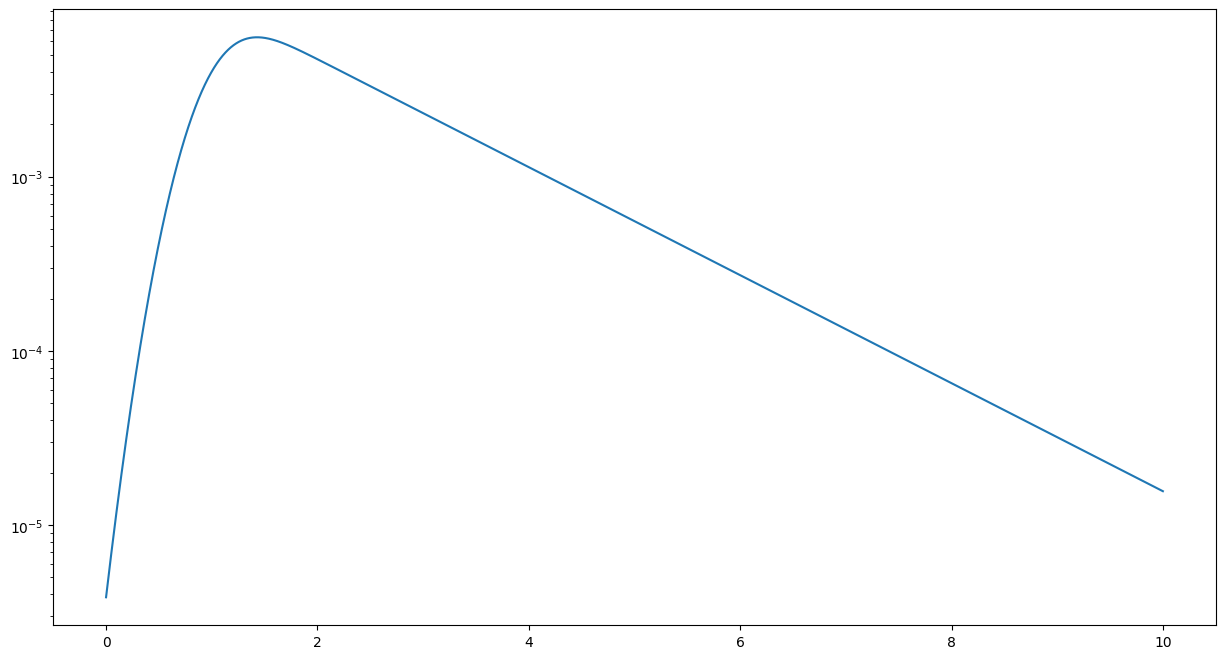

In [359]:

expr_lar_g = smp.lambdify([t, A_s, A_f, tau_s, tau_f, t0, sig], fconv)
t_num = np.linspace(0,10,2500000)
fig, axes = plt.subplots(1,1, figsize=(15,8))
ax = axes
ax.plot(t_num, expr_lar_g(t_num,actAs, actAf, acttaus, acttauf, 1, 0.3))
ax.set_yscale("log")
#ax.set_ylim(bottom=0.01)
#ax.set_xlim(0,10000)


In [326]:
f = smp.exp(-(t)*smp.Heaviside(t-20)
g = smp.exp(-t**2)
h = convolve(f,g,t,-oo,oo)
h

SyntaxError: '(' was never closed (446187139.py, line 1)

In [ ]:
fconv

sqrt(2)*(Integral(A_S*exp(-tconv**2/(2*sigma**2))*exp(t_0/tau_S)*exp(-tconv/tau_S)*exp(t*tconv/sigma**2)*Heaviside(-t_0 + tconv), (tconv, 0, t)) + Integral(A_F*tau_S*exp(-tconv**2/(2*sigma**2))*exp(t_0/tau_F)*exp(-tconv/tau_F)*exp(t*tconv/sigma**2)*Heaviside(-t_0 + tconv), (tconv, 0, t)))*exp(-t**2/(2*sigma**2))/(2*sqrt(pi)*sigma*tau_S)